In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('data.csv', encoding='iso-8859-1', sep=';', header=0, index_col=0).reset_index()
columns = df.columns.tolist()
df.drop(columns[1:6], axis=1, inplace=True)




In [13]:
colunas = ['Faixa Etária', 'Gênero',
       'Ocupação', 'Qual é o seu nível de escolaridade?',
       'Qual é a sua área de atuação profissional?',
       'Você já foi vítima ou conhece casos de vazamento de dados pessoais (seus ou de terceiros) na internet?',
       'Em uma escala de 1 a 10, qual o seu nível de preocupação com a segurança dos seus dados na internet?',
       'Você conhece a Lei Geral de Proteção de Dados (LGPD) e suas implicações na segurança digital?',
       'Você já recebeu e-mails ou mensagens suspeitas (phishing) solicitando informações pessoais?',
       'Com que frequência você lê as políticas de privacidade dos serviços que utiliza?',
       'Você acredita que sistemas de avaliação, como o projeto que estamos desenvolvendo (DES), podem ajudar a conscientizar os usuários e melhorar a segurança online?']

df = df[colunas]



In [14]:
analises = {
    'Faixa Etária': df['Faixa Etária'].value_counts(),
    'Gênero': df['Gênero'].value_counts(),
    'Ocupação': df['Ocupação'].value_counts(),
    'Escolaridade': df['Qual é o seu nível de escolaridade?'].value_counts(),
    'Área de Atuação': df['Qual é a sua área de atuação profissional?'].value_counts(),
    'Vítima de Vazamento': df['Você já foi vítima ou conhece casos de vazamento de dados pessoais (seus ou de terceiros) na internet?'].value_counts(),
    'Preocupação com Segurança': df['Em uma escala de 1 a 10, qual o seu nível de preocupação com a segurança dos seus dados na internet?'].value_counts(),
    'Conhecimento da LGPD': df['Você conhece a Lei Geral de Proteção de Dados (LGPD) e suas implicações na segurança digital?'].value_counts(),
    'Phishing': df['Você já recebeu e-mails ou mensagens suspeitas (phishing) solicitando informações pessoais?'].value_counts(),
    'Leitura de Políticas de Privacidade': df['Com que frequência você lê as políticas de privacidade dos serviços que utiliza?'].value_counts(),
    'Avaliação do Projeto DES': df['Você acredita que sistemas de avaliação, como o projeto que estamos desenvolvendo (DES), podem ajudar a conscientizar os usuários e melhorar a segurança online?'].value_counts()
}
# transforme as colunas nos nomes que estao na chave do dicionario
df.columns = analises.keys()


In [15]:
df = df[df['Faixa Etária'] != 'Menor de 18 anos']

In [16]:
import matplotlib.pyplot as plt

def graficos_componente(componente, nome_curto):
    perfis = ['Faixa Etária', 'Escolaridade', 'Gênero']
    fig, axs = plt.subplots(1, len(perfis), figsize=(54, 8))
    fig.suptitle(nome_curto, fontsize=50, fontweight='bold')

    for i, perfil in enumerate(perfis):
        tabela = pd.crosstab(df[perfil], df[componente], normalize='index') * 100
        bars = tabela.plot(kind='bar', stacked=True, ax=axs[i], legend=False)
        ax = axs[i]
        if i == len(perfis) - 1:
            ax.legend(title=perfil, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)
        ax.set_title(perfis[i], fontsize=40)
        ax.set_ylabel('%')
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
        ax.tick_params(axis='x', rotation=0,labelsize=20)
        ax.set_xlabel('')
        for container in bars.containers:
            for bar in container:
                height = bar.get_height()
                if height > 5:
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + height / 2,
                        f'{height:.1f}%',
                        ha='center',
                        va='center',
                        fontsize=24,
                        color='white'
                    )

    plt.tight_layout()
    plt.show()

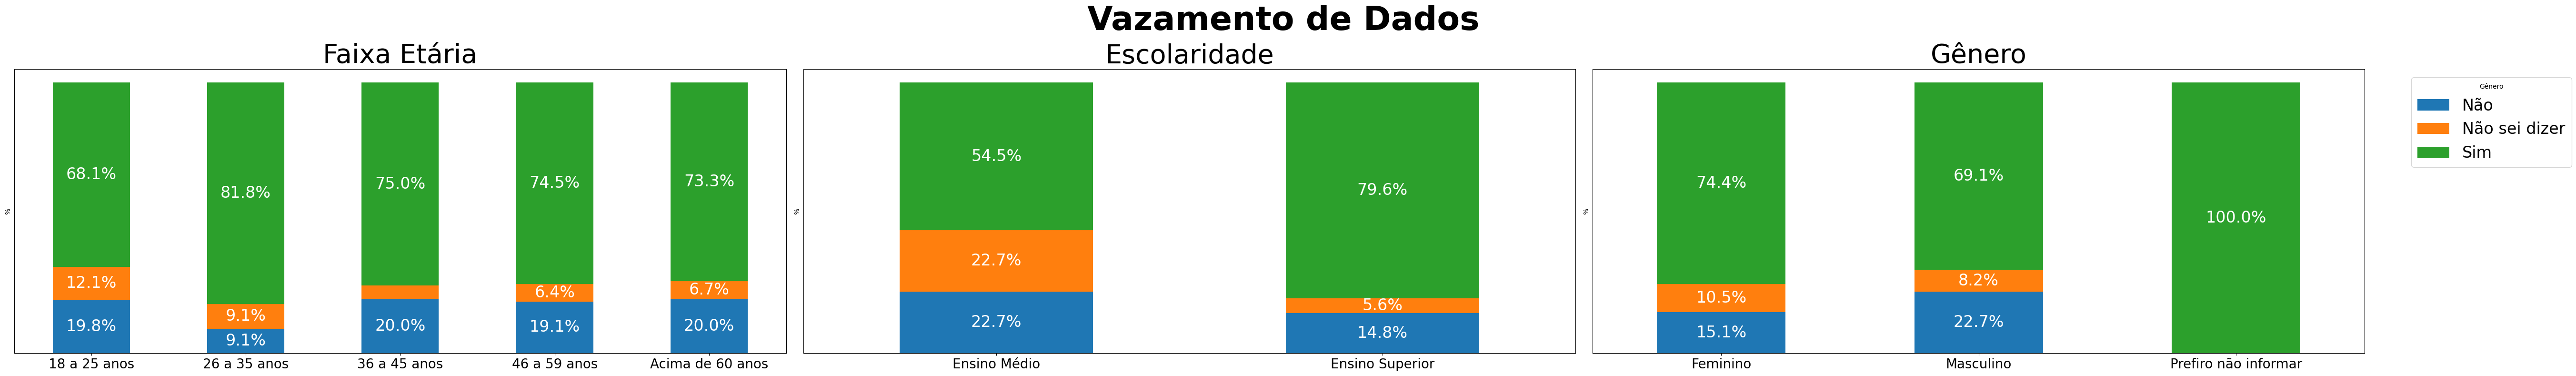

In [17]:
graficos_componente('Vítima de Vazamento', 'Vazamento de Dados')


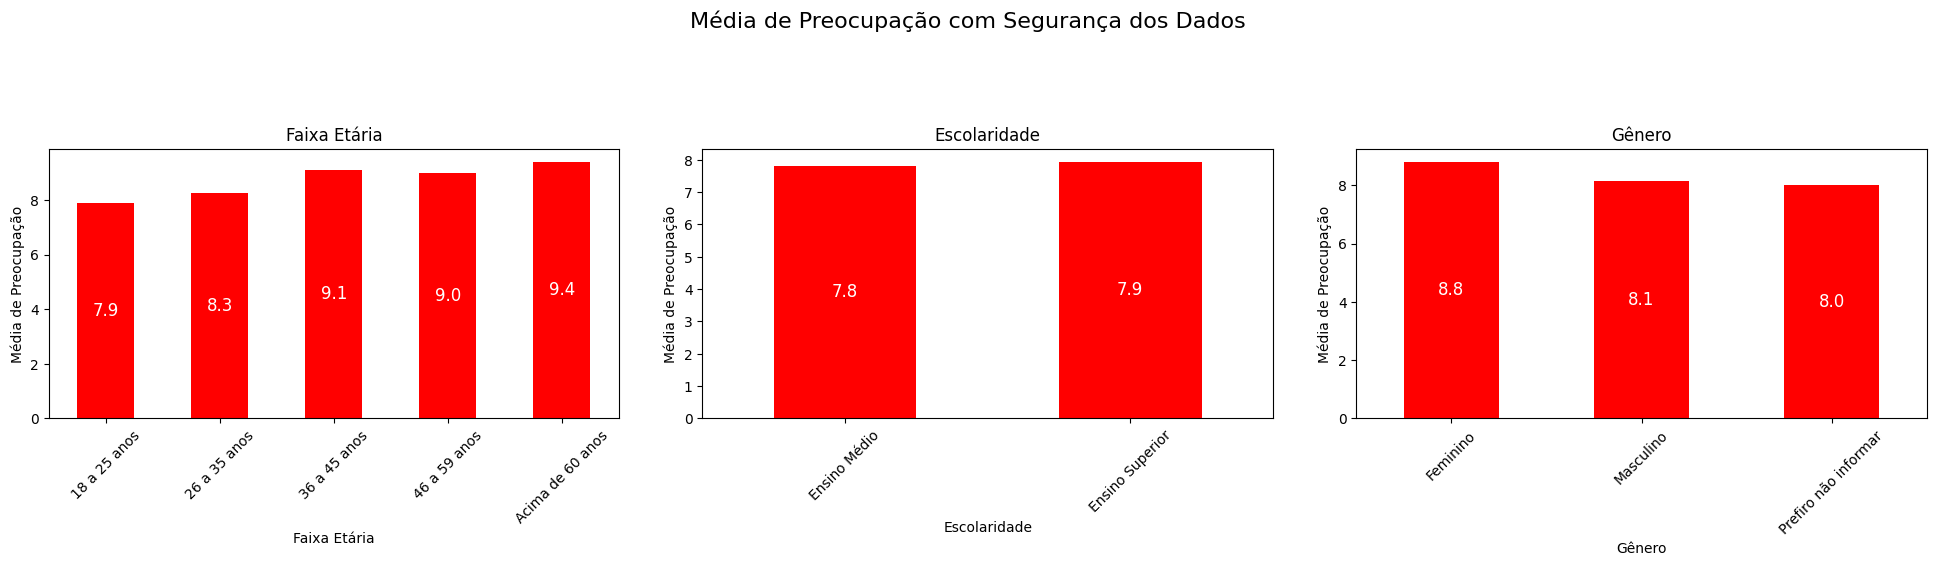

In [18]:

def graficos_medias_preocupacao():
    perfis = ['Faixa Etária', 'Escolaridade', 'Gênero']
    fig, axs = plt.subplots(1, len(perfis), figsize=(20, 6))  
    fig.suptitle('Média de Preocupação com Segurança dos Dados', fontsize=16)

    for i, perfil in enumerate(perfis):
        media = df.groupby(perfil)['Preocupação com Segurança'].mean().round(2)
        bars = media.plot(kind='bar', ax=axs[i], color='red')  
        axs[i].set_title(perfis[i], fontsize=12)
        axs[i].set_ylabel('Média de Preocupação', fontsize=10)
        axs[i].set_xlabel(perfis[i], fontsize=10)
        axs[i].tick_params(axis='x', rotation=45)  
        for container in bars.containers:
            for bar in container:
                height = bar.get_height()
                if height > 5:
                    axs[i].text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + height / 2,
                        f'{height:.1f}',
                        ha='center',
                        va='center',
                        fontsize=12,
                        color='white'
                    )
    plt.tight_layout(pad=3.0, rect=[0, 0, 1, 0.96])
    plt.show()

# Chama a função
graficos_medias_preocupacao()


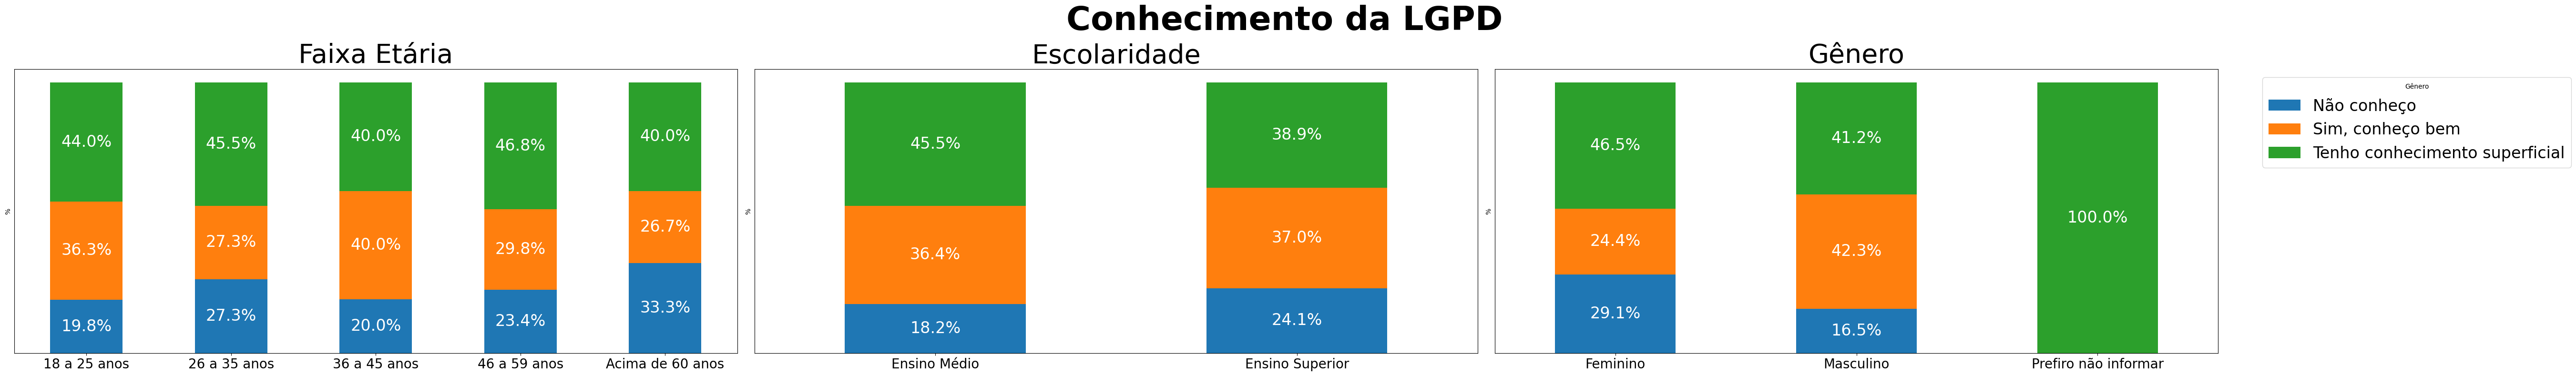

In [19]:
graficos_componente('Conhecimento da LGPD', 'Conhecimento da LGPD')

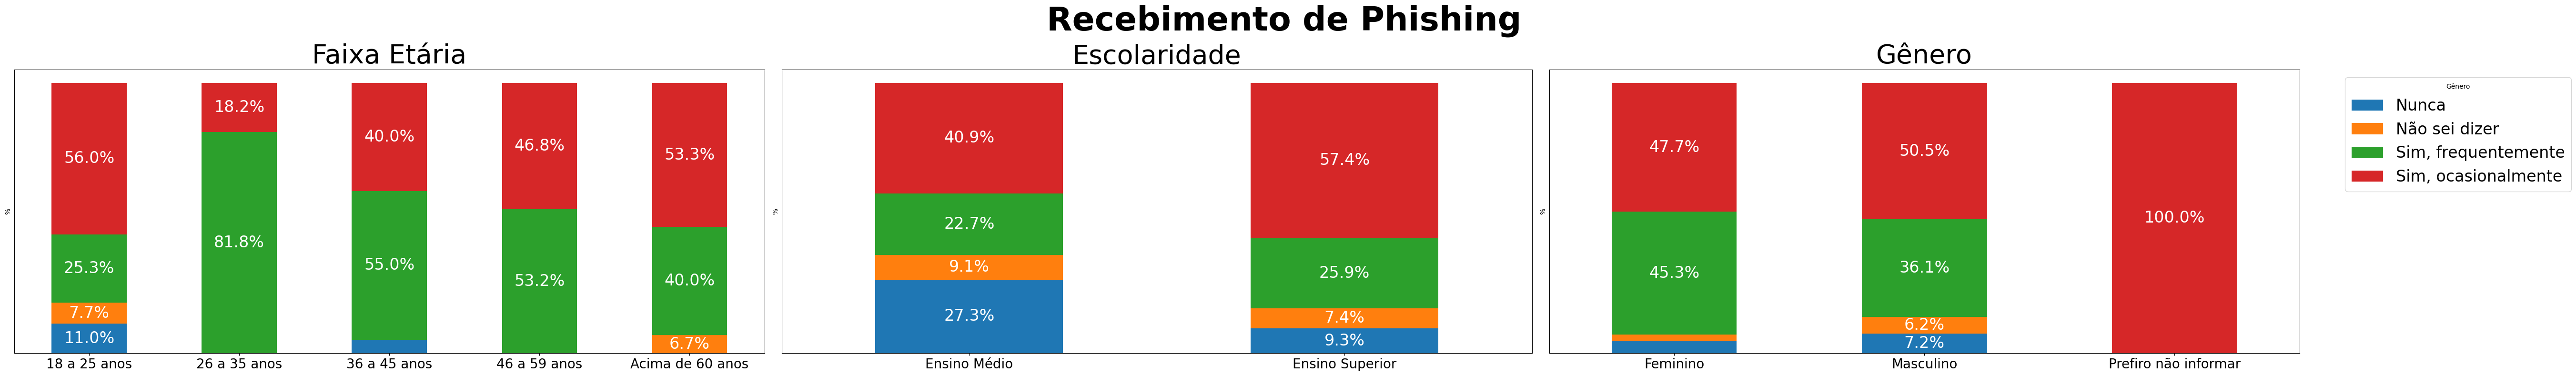

In [20]:
graficos_componente('Phishing', 'Recebimento de Phishing')


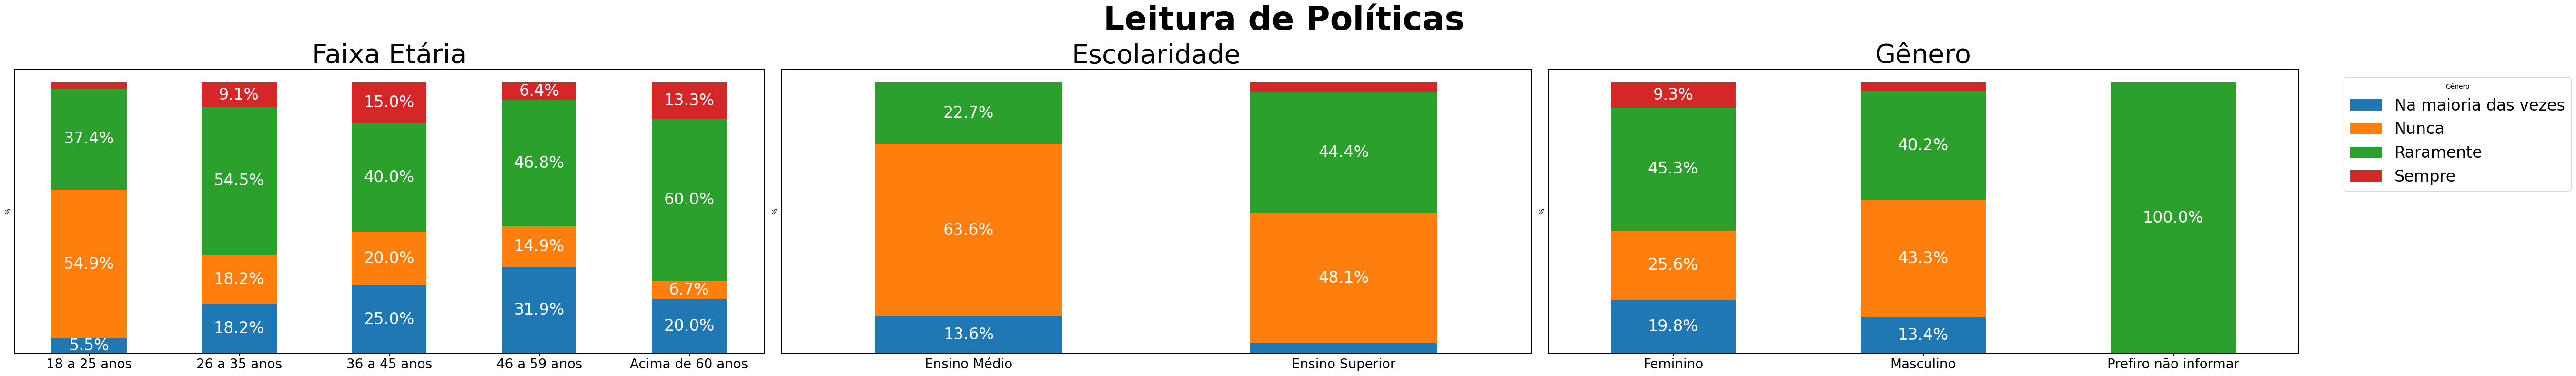

In [21]:
graficos_componente('Leitura de Políticas de Privacidade', 'Leitura de Políticas')